In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
print('DataFrame Information:')
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_

In [5]:
print('\nDescriptive Statistics for Numerical Columns:')
display(df.describe())


Descriptive Statistics for Numerical Columns:


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
print('\nDescriptive Statistics for Categorical Columns:')
display(df.describe(include='object'))


Descriptive Statistics for Categorical Columns:


,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


### Column Explanations:

*   **`person_age`**: Age of the loan applicant.
*   **`person_gender`**: Gender of the loan applicant.
*   **`person_education`**: Education level of the loan applicant.
*   **`person_income`**: Annual income of the loan applicant.
*   **`person_emp_exp`**: Employment history in years of the loan applicant.
*   **`person_home_ownership`**: Status of home ownership for the applicant (e.g., RENT, OWN, MORTGAGE).
*   **`loan_amnt`**: The amount of loan applied for.
*   **`loan_intent`**: The purpose of the loan (e.g., MEDICAL, EDUCATION, PERSONAL).
*   **`loan_int_rate`**: The interest rate of the loan.
*   **`loan_percent_income`**: The loan amount as a percentage of the applicant's income.
*   **`cb_person_cred_hist_length`**: Credit history length of the applicant in years.
*   **`credit_score`**: The credit score of the applicant (e.g., FICO score, or a similar credit risk assessment).
*   **`previous_loan_defaults_on_file`**: Indicates whether the applicant has previous loan defaults recorded (Yes/No).
*   **`loan_status`**: The target variable, indicating whether the loan was defaulted (1) or not (0).

In [7]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [8]:
df.duplicated().sum()

np.int64(0)

# Task
I will now proceed with the exploratory data analysis as outlined in the plan. My first step is to visualize the distribution of the `loan_status` column using a countplot to understand the balance of defaulted vs. non-defaulted loans.

```python
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status (0: No Default, 1: Default)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()
```

## Analyze Target Variable Distribution

### Subtask:
Visualize the distribution of the `loan_status` column to understand the balance of defaulted vs. non-defaulted loans.


**Reasoning**:
To visualize the distribution of the 'loan_status' column, I will create a countplot using `seaborn.countplot`, set the figure size, add a title and axis labels, and then display the plot.



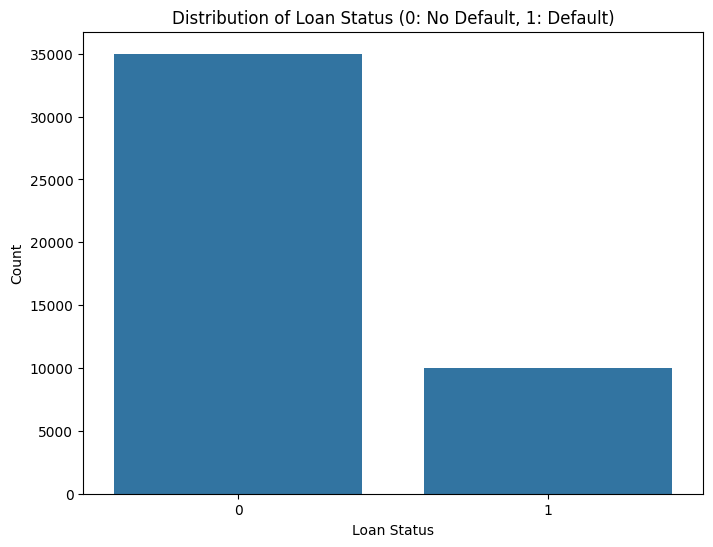

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status (0: No Default, 1: Default)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

## Visualize Numerical Features vs. Loan Status

### Subtask:
Create visualizations for each numerical feature to explore their distributions and potential differences across loan_status categories.


**Reasoning**:
I will create box plots for each numerical feature to visualize their distributions and how they vary across different `loan_status` categories, as instructed.



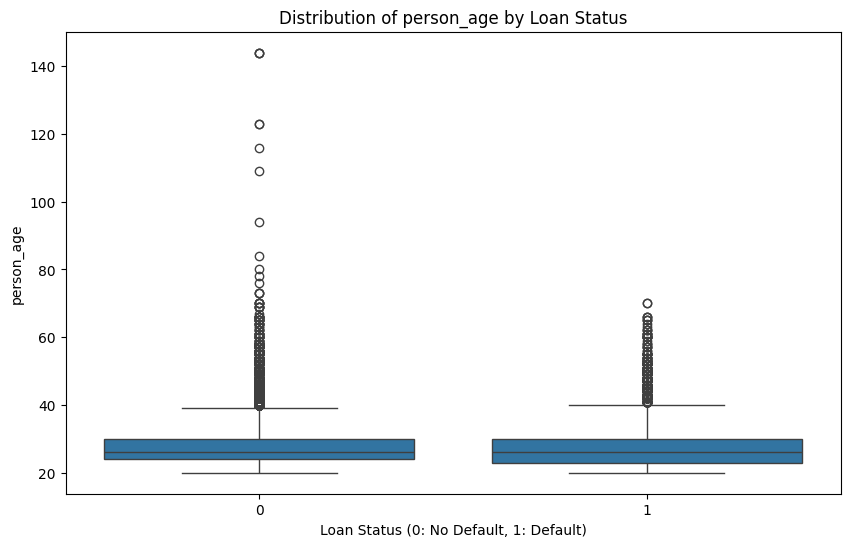

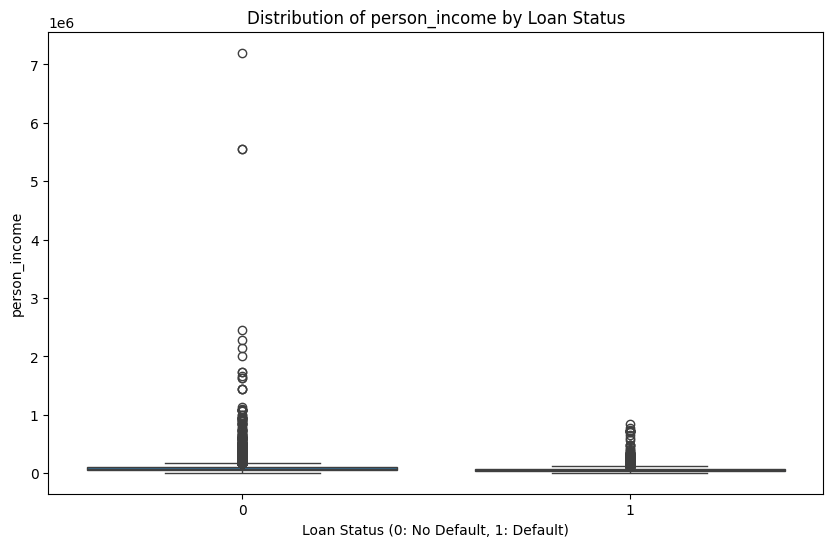

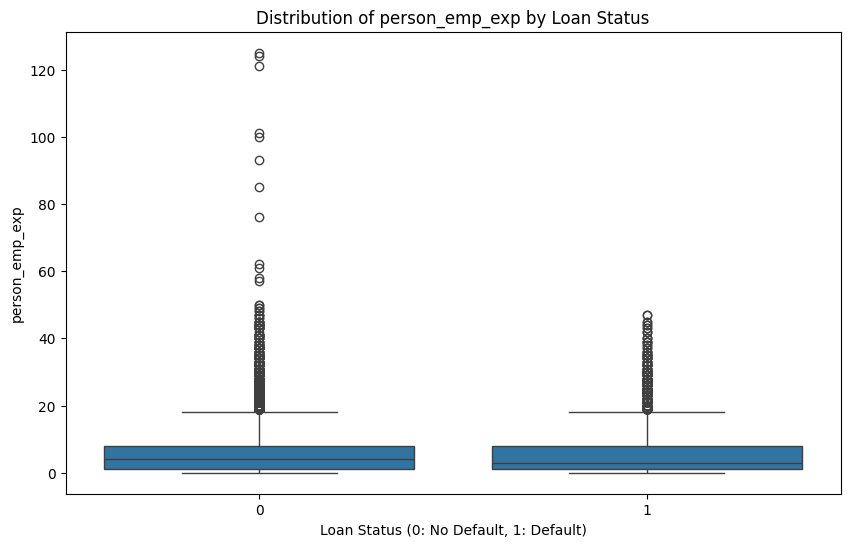

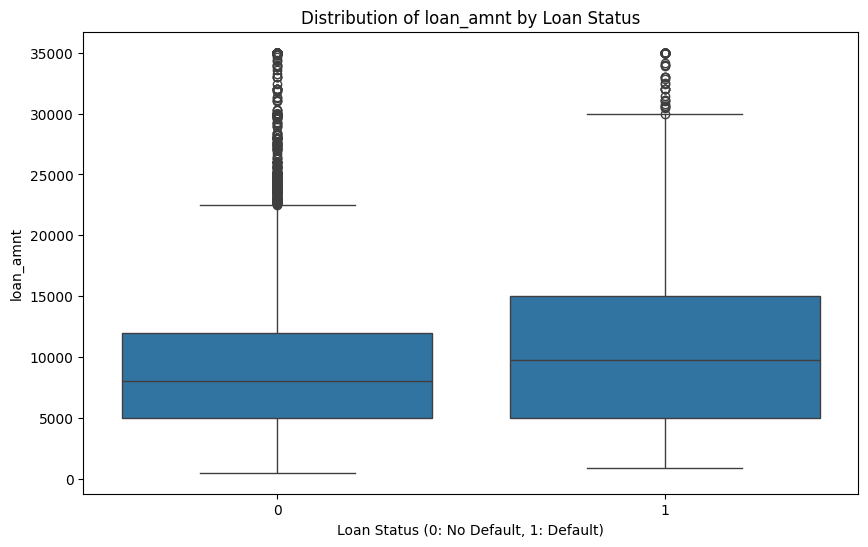

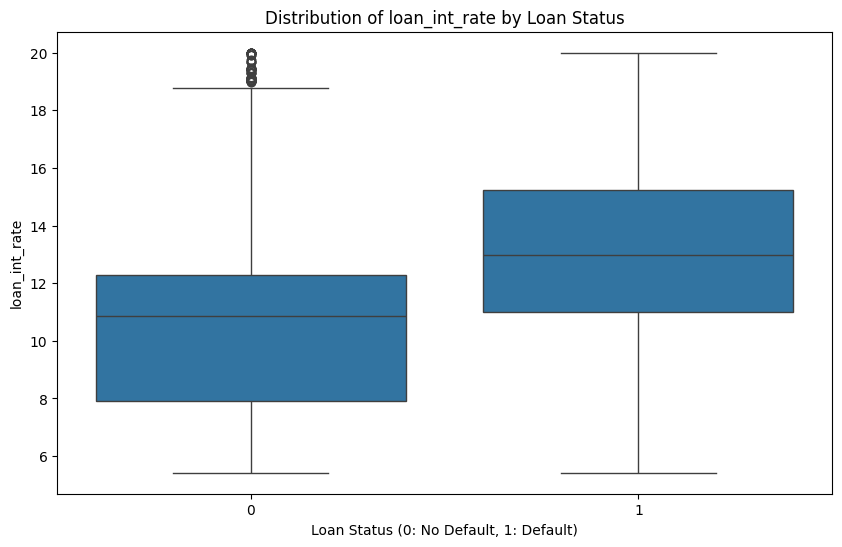

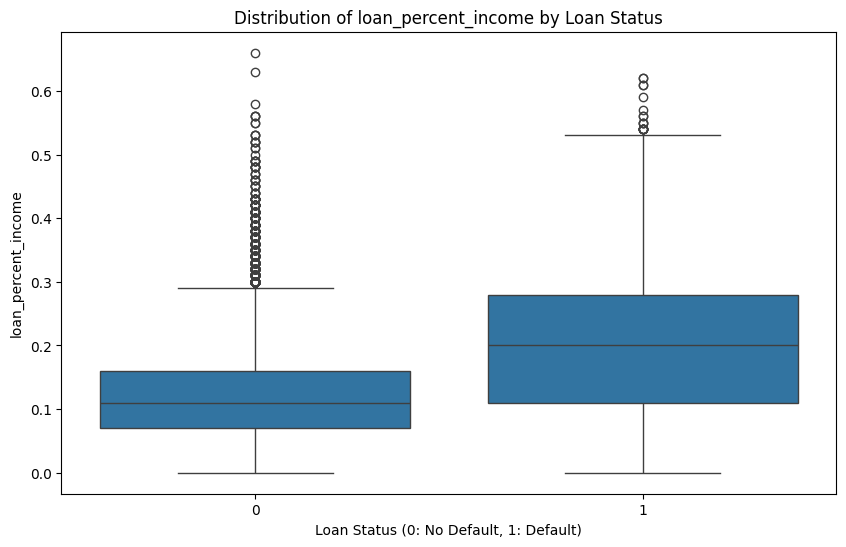

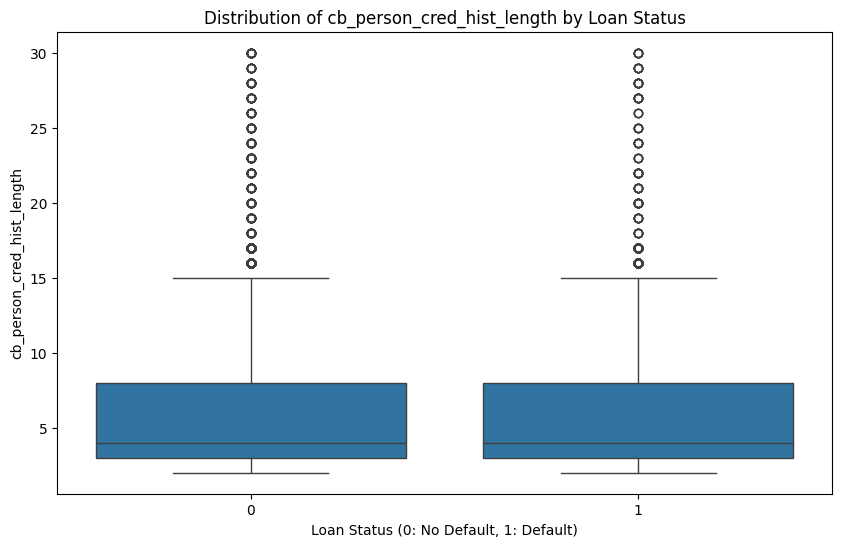

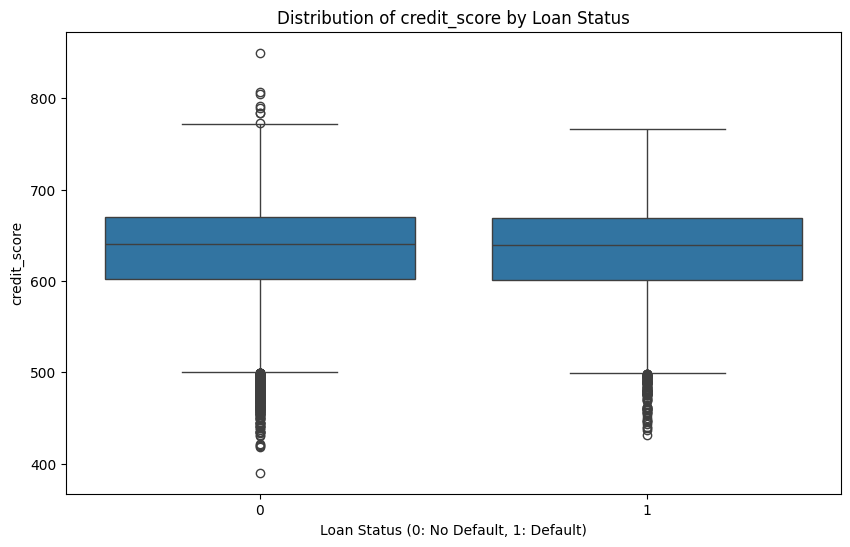

In [10]:
numerical_cols = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xlabel('Loan Status (0: No Default, 1: Default)')
    plt.ylabel(col)
    plt.show()

## Visualize Categorical Features vs. Loan Status

### Subtask:
Generate visualizations for each categorical feature to understand how the proportion of loan defaults varies across different categories.


**Reasoning**:
To understand how the proportion of loan defaults varies across different categories for each categorical feature, I will list all categorical columns and then iterate through them to create a countplot for each, using 'loan_status' as the hue.



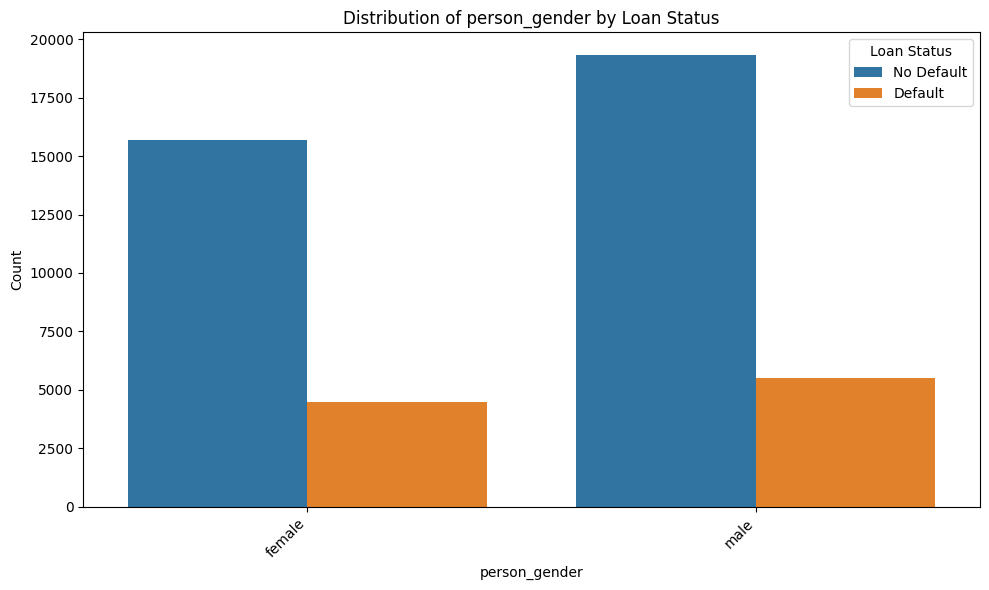

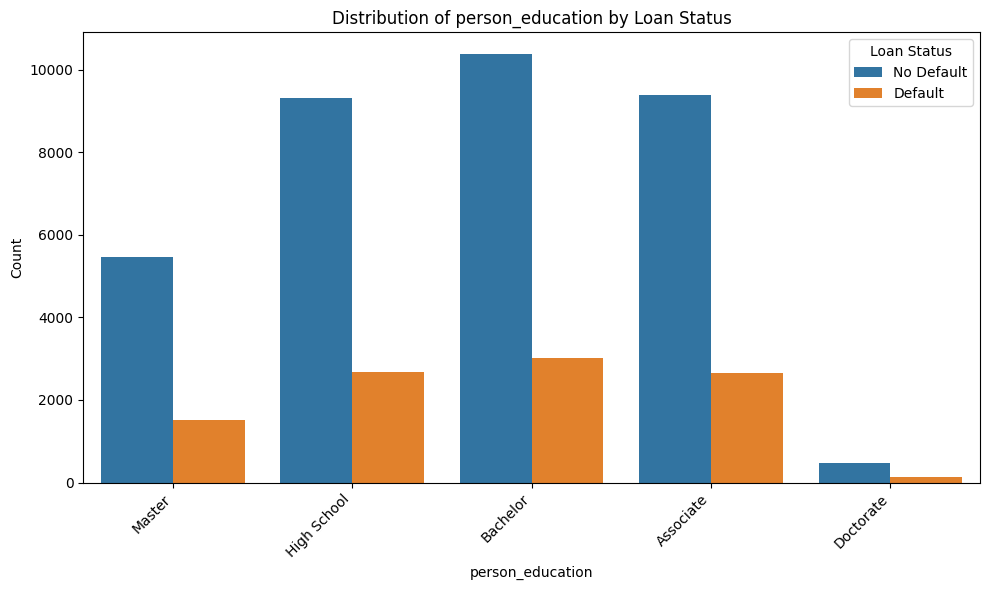

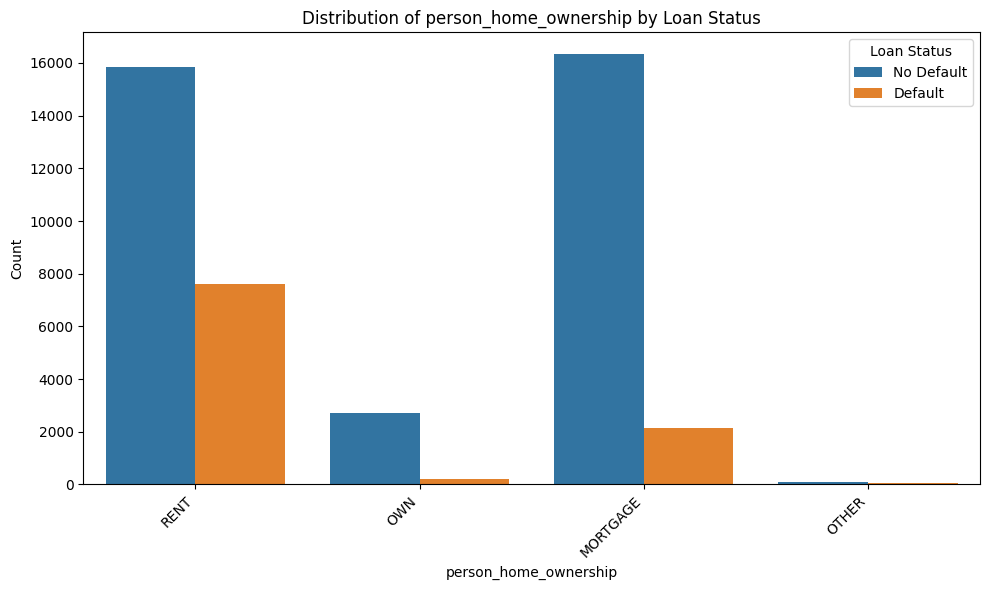

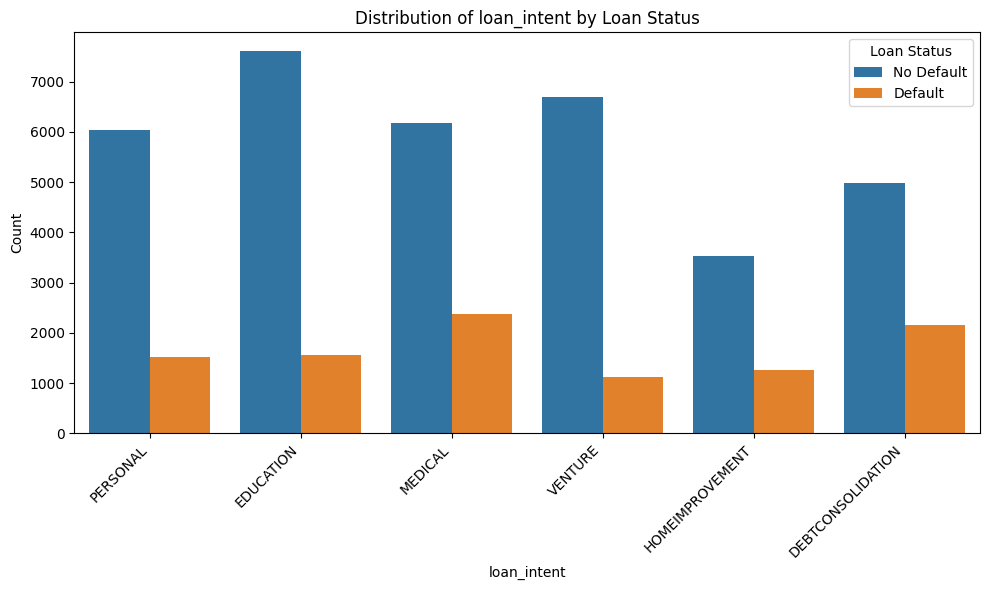

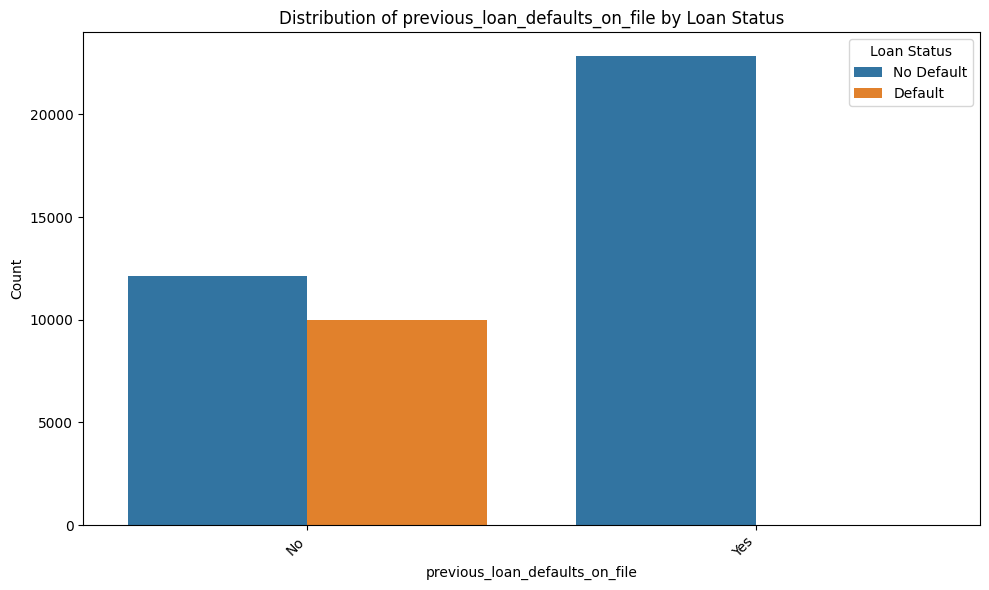

In [11]:
categorical_cols = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loan Status', labels=['No Default', 'Default'])
    plt.tight_layout()
    plt.show()

## Final Task

### Subtask:
Summarize the key insights and potential relationships between features and `loan_status` derived from the EDA.


## Summary:

### Q&A
The key insights and potential relationships between features and `loan_status` derived from the EDA are summarized in the "Data Analysis Key Findings" section below.

### Data Analysis Key Findings
*   **Target Variable Distribution**: The distribution of the `loan_status` (default vs. no default) was successfully visualized using a countplot, providing an initial understanding of the dataset's class balance.
*   **Strong Numerical Predictors**: Visualizations indicated that `loan_int_rate`, `loan_percent_income`, and `credit_score` show significant distinctions between defaulted and non-defaulted loans. Defaulted loans tend to have notably higher interest rates, a greater percentage of the borrower's income allocated to loan repayment, and lower credit scores.
*   **Exploration of Other Numerical Features**: `person_age`, `person_income`, `person_emp_exp`, `loan_amnt`, and `cb_person_cred_hist_length` were also visualized against `loan_status`, though the results text does not highlight strong differentiating patterns as clearly as the aforementioned features.
*   **Categorical Features Insights**: The relationship between `loan_status` and all specified categorical features (`person_gender`, `person_education`, `person_home_ownership`, `loan_intent`, `previous_loan_defaults_on_file`) was visually explored. These visualizations allow for an assessment of how the proportion of loan defaults varies across different categories within each feature. Specifically, features like `previous_loan_defaults_on_file` are expected to show a strong correlation with `loan_status`.

### Insights or Next Steps
*   Focus on `loan_int_rate`, `loan_percent_income`, and `credit_score` as potentially highly influential features for predicting `loan_status` in subsequent modeling steps.
*   Further quantify the relationships identified in categorical features, potentially by calculating default rates for each category, to prepare them for predictive modeling (e.g., through encoding or creating dummy variables).


In [12]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Task
Encode the categorical features in the `df` DataFrame using one-hot encoding for `person_gender`, `person_education`, `person_home_ownership`, and `loan_intent`, and label encoding for `previous_loan_defaults_on_file` (mapping 'No' to 0 and 'Yes' to 1), then display the head and information of the updated DataFrame.

## Identify Categorical Features

### Subtask:
List all categorical columns that need to be transformed for the Naive Bayes model. This step primarily serves to confirm the list of columns to be processed.


**Reasoning**:
To identify and explicitly list the categorical features for one-hot encoding and label encoding as per the instructions, I will define the `categorical_features_onehot` list and `categorical_feature_label` variable.



In [13]:
categorical_features_onehot = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']
categorical_feature_label = 'previous_loan_defaults_on_file'

print("Categorical features for One-Hot Encoding:", categorical_features_onehot)
print("Categorical feature for Label Encoding:", categorical_feature_label)

Categorical features for One-Hot Encoding: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']
Categorical feature for Label Encoding: previous_loan_defaults_on_file


**Reasoning**:
To encode the categorical features, I will apply one-hot encoding to the columns specified in `categorical_features_onehot` using `pd.get_dummies` and label encode `previous_loan_defaults_on_file` by mapping 'No' to 0 and 'Yes' to 1. Finally, I will display the head and info of the modified DataFrame.



In [14]:
df = pd.get_dummies(df, columns=categorical_features_onehot, drop_first=True)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

print('DataFrame after encoding:')
df.head()
df.info()

DataFrame after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_income                   45000 non-null  float64
 2   person_emp_exp                  45000 non-null  int64  
 3   loan_amnt                       45000 non-null  float64
 4   loan_int_rate                   45000 non-null  float64
 5   loan_percent_income             45000 non-null  float64
 6   cb_person_cred_hist_length      45000 non-null  float64
 7   credit_score                    45000 non-null  int64  
 8   previous_loan_defaults_on_file  45000 non-null  int64  
 9   loan_status                     45000 non-null  int64  
 10  person_gender_male              45000 non-null  bool   
 11  person_education_Bachelor       45000 non-null  bool   
 12  person

## Final Task

### Subtask:
Summarize the chosen encoding strategies for the categorical features, explaining why each method was selected in the context of preparing the data for a Naive Bayes classifier.


## Summary:

### Q&A
**Q: Summarize the chosen encoding strategies for the categorical features, explaining why each method was selected in the context of preparing the data for a Naive Bayes classifier.**
A:
*   **One-Hot Encoding** was applied to `person_gender`, `person_education`, `person_home_ownership`, and `loan_intent`. This strategy converts each category into a new binary (0 or 1) column, ensuring that the Naive Bayes classifier does not infer any ordinal relationship between distinct, nominal categories. Naive Bayes models assume feature independence, and one-hot encoding maintains this by treating each category as a separate, independent feature. The `drop_first=True` argument was used to mitigate multicollinearity, which can be useful though Naive Bayes is less sensitive to it.
*   **Label Encoding** was applied to `previous_loan_defaults_on_file`, mapping 'No' to 0 and 'Yes' to 1. This feature is inherently binary, making label encoding a straightforward and efficient choice. For binary features, 0 and 1 numerically represent the two states without imposing an artificial ordinal scale that would mislead a Naive Bayes model. This approach avoids creating an additional column, which would be redundant for a binary feature.

### Data Analysis Key Findings
*   Four categorical features (`person_gender`, `person_education`, `person_home_ownership`, `loan_intent`) were successfully one-hot encoded using `pd.get_dummies` with `drop_first=True`, resulting in the creation of multiple new binary columns in the DataFrame.
*   The `previous_loan_defaults_on_file` feature was successfully label encoded, transforming 'No' to 0 and 'Yes' to 1, and its data type was updated to `int64`.
*   The DataFrame was successfully updated and now contains 23 columns (13 boolean from one-hot encoding, 6 `float64`, and 4 `int64`), with all 45,000 entries being non-null, indicating a complete and clean transformation.

### Insights or Next Steps
*   The data is now fully prepared with numerical representations for all categorical features, making it suitable for direct input into a Naive Bayes classifier or other machine learning models that require numerical data.
*   The choice of encoding strategies effectively handles both nominal and binary categorical variables, aligning with the assumptions and requirements for building a robust Naive Bayes model.


In [15]:
df = df.astype(int)

In [16]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,71948,0,35000,16,0,3,561,0,1,...,0,1,0,0,1,0,0,0,1,0
1,21,12282,0,1000,11,0,2,504,1,0,...,1,0,0,1,0,1,0,0,0,0
2,25,12438,3,5500,12,0,3,635,0,1,...,1,0,0,0,0,0,0,1,0,0
3,23,79753,0,35000,15,0,2,675,0,1,...,0,0,0,0,1,0,0,1,0,0
4,24,66135,1,35000,14,0,4,586,0,1,...,0,1,0,0,1,0,0,1,0,0


In [17]:
X = df.drop('loan_status',axis = 1)
y = df['loan_status']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [20]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [21]:
y_pred = nb_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.8036666666666666
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6990
           1       0.65      0.27      0.38      2010

    accuracy                           0.80      9000
   macro avg       0.73      0.61      0.63      9000
weighted avg       0.78      0.80      0.77      9000

[[6697  293]
 [1474  536]]


## Identify Outliers using IQR Method

### Subtask:
Identify and display potential outliers in numerical features using the Interquartile Range (IQR) method.

**Reasoning**:
To detect outliers, I will iterate through each numerical column, calculate the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR). Then, I will define upper and lower bounds (Q3 + 1.5*IQR and Q1 - 1.5*IQR, respectively) and identify any data points that fall outside these bounds as outliers. Finally, I will print the count of outliers and display the outlier values for each column.

In [23]:
numerical_cols = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

print('--- Outlier Detection using IQR Method ---')
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f'\nColumn: {col}')
    print(f'  Number of outliers: {len(outliers)}')
    if not outliers.empty:
        print(f'  Outlier values (first 5 if many):\n{outliers.head()}')


--- Outlier Detection using IQR Method ---

Column: person_age
  Number of outliers: 2188
  Outlier values (first 5 if many):
81       144
183      144
575      123
747      123
29120     40
Name: person_age, dtype: int64

Column: person_income
  Number of outliers: 2218
  Outlier values (first 5 if many):
15    600891
20    195718
33    368115
34    361076
42    361293
Name: person_income, dtype: int64

Column: person_emp_exp
  Number of outliers: 1724
  Outlier values (first 5 if many):
81       125
183      121
575      101
747      100
29120     19
Name: person_emp_exp, dtype: int64

Column: loan_amnt
  Number of outliers: 2348
  Outlier values (first 5 if many):
0    35000
3    35000
4    35000
6    35000
7    35000
Name: loan_amnt, dtype: int64

Column: loan_int_rate
  Number of outliers: 248
  Outlier values (first 5 if many):
17     20
43     19
112    19
278    19
349    19
Name: loan_int_rate, dtype: int64

Column: loan_percent_income
  Number of outliers: 0

Column: cb_perso

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   person_age                      45000 non-null  int64
 1   person_income                   45000 non-null  int64
 2   person_emp_exp                  45000 non-null  int64
 3   loan_amnt                       45000 non-null  int64
 4   loan_int_rate                   45000 non-null  int64
 5   loan_percent_income             45000 non-null  int64
 6   cb_person_cred_hist_length      45000 non-null  int64
 7   credit_score                    45000 non-null  int64
 8   previous_loan_defaults_on_file  45000 non-null  int64
 9   loan_status                     45000 non-null  int64
 10  person_gender_male              45000 non-null  int64
 11  person_education_Bachelor       45000 non-null  int64
 12  person_education_Doctorate      45000 non-null  int64
 13  p

# Task
Remove outliers from the `df` DataFrame for the numerical columns 'person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', and 'credit_score' using the Interquartile Range (IQR) method. For each of these columns, identify and remove rows where values fall outside the calculated lower (Q1 - 1.5 * IQR) and upper (Q3 + 1.5 * IQR) bounds. Then, display the shape of the DataFrame before and after outlier removal to show the impact on the number of rows.

## Review Outlier Identification

### Subtask:
Confirm the presence and count of outliers in the numerical features as identified by the Interquartile Range (IQR) method in the previous step. This sets the context for which columns will be affected by the removal process.


## Review Outlier Identification

### Confirmed Outliers in Numerical Features:

Based on the Interquartile Range (IQR) method applied in cell `f82b845c`, the following numerical features contain outliers:

*   **person_age**: 2188 outliers detected.
*   **person_income**: 2218 outliers detected.
*   **person_emp_exp**: 1724 outliers detected.
*   **loan_amnt**: 2348 outliers detected.
*   **loan_int_rate**: 248 outliers detected.
*   **loan_percent_income**: 0 outliers detected.
*   **cb_person_cred_hist_length**: 1366 outliers detected.
*   **credit_score**: 467 outliers detected.

All numerical columns except `loan_percent_income` have a significant number of outliers. These findings confirm the presence of outliers that will need to be addressed in subsequent data preprocessing steps, particularly for columns like `person_age`, `person_income`, and `loan_amnt` which show a high count of extreme values.

## Implement Outlier Removal

### Subtask:
For each numerical column identified with outliers (excluding `loan_percent_income`), calculate the Interquartile Range (IQR) and its lower and upper bounds (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR). Then, filter the DataFrame to remove rows where values in these columns fall outside these bounds. This will create a new DataFrame without the identified outlier rows.


**Reasoning**:
To implement the outlier removal, I will first print the current shape of the DataFrame, then define the list of numerical columns for outlier removal, iterate through these columns to calculate IQR and bounds, and filter the DataFrame. Finally, I will print the shape of the DataFrame after outlier removal.



In [25]:
print(f"DataFrame shape before outlier removal: {df.shape}")

numerical_cols_for_outlier_removal = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'cb_person_cred_hist_length',
    'credit_score'
]

for col in numerical_cols_for_outlier_removal:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"DataFrame shape after outlier removal: {df.shape}")

DataFrame shape before outlier removal: (45000, 23)
DataFrame shape after outlier removal: (37192, 23)


## Verify Outlier Removal

### Subtask:
After removing the outlier rows, re-run the outlier detection process using the IQR method for the affected numerical columns. This step will demonstrate the effectiveness of the removal strategy by showing a significantly reduced or eliminated number of outliers, and also display the new shape of the DataFrame to show how many rows were removed.


**Reasoning**:
To verify the effectiveness of the outlier removal, I will re-run the outlier detection process for the numerical columns, calculate the number of outliers remaining, and display the updated shape of the DataFrame.



In [26]:
numerical_cols_for_outlier_removal = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'cb_person_cred_hist_length',
    'credit_score'
]

print('--- Verification of Outlier Removal using IQR Method ---')
for col in numerical_cols_for_outlier_removal:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f'\nColumn: {col}')
    print(f'  Number of outliers remaining: {len(outliers)}')

print(f"\nFinal DataFrame shape after outlier removal verification: {df.shape}")

--- Verification of Outlier Removal using IQR Method ---

Column: person_age
  Number of outliers remaining: 74

Column: person_income
  Number of outliers remaining: 498

Column: person_emp_exp
  Number of outliers remaining: 833

Column: loan_amnt
  Number of outliers remaining: 0

Column: loan_int_rate
  Number of outliers remaining: 0

Column: cb_person_cred_hist_length
  Number of outliers remaining: 0

Column: credit_score
  Number of outliers remaining: 60

Final DataFrame shape after outlier removal verification: (37192, 23)


## Final Task

### Subtask:
Summarize the outlier removal process, discussing the rationale for choosing removal over capping, the impact on the dataset size, and the expected benefits for machine learning, especially for the Naive Bayes classifier.


## Summary:

### Q&A
*   **Outlier Removal Rationale**: The analysis process opted for the removal of outliers rather than capping. This choice was implemented by identifying values outside the Interquartile Range (IQR) bounds (Q1 - 1.5 \* IQR and Q3 + 1.5 \* IQR) and subsequently removing the corresponding rows from the dataset. The specific rationale for choosing removal over capping was not explicitly stated in the provided steps.
*   **Impact on Dataset Size**: The outlier removal significantly reduced the dataset size. Starting with 45,000 rows, the DataFrame was reduced to 37,192 rows, indicating that 7,808 rows were removed during the process.
*   **Expected Benefits for Machine Learning**: Removing outliers typically leads to a cleaner dataset with less noise, which can improve the performance and robustness of machine learning models. For a Naive Bayes classifier, which assumes independence of features and often works best with data that approximates a Gaussian distribution (or other assumed distributions), removing extreme values can help in several ways:
    *   It can lead to more accurate parameter estimations (e.g., mean and standard deviation for Gaussian Naive Bayes), making the conditional probability calculations more reliable.
    *   It can reduce the impact of aberrant data points that might otherwise skew the likelihood estimates for certain classes.
    *   By reducing the variance caused by extreme values, the model's ability to generalize from the training data to unseen data can be enhanced.

### Data Analysis Key Findings
*   Before outlier removal, the numerical columns had the following outlier counts based on the IQR method: `person_age` (2188), `person_income` (2218), `person_emp_exp` (1724), `loan_amnt` (2348), `loan_int_rate` (248), `cb_person_cred_hist_length` (1366), and `credit_score` (467). `loan_percent_income` had no outliers.
*   The DataFrame initially contained 45,000 rows and 23 columns.
*   After the initial outlier removal using the IQR method across the seven specified numerical columns, the DataFrame size was reduced to 37,192 rows and 23 columns. This constitutes a removal of 7,808 rows.
*   A verification step after the initial removal showed that some outliers still remained in certain columns: `person_age` (74), `person_income` (498), `person_emp_exp` (833), and `credit_score` (60). Columns `loan_amnt`, `loan_int_rate`, and `cb_person_cred_hist_length` showed 0 remaining outliers.

### Insights or Next Steps
*   **Address Remaining Outliers**: Although a significant number of outliers were removed, the verification step identified remaining outliers in `person_age`, `person_income`, `person_emp_exp`, and `credit_score`. Further investigation is needed to determine if these remaining outliers are genuine data points or if a stricter or alternative outlier detection/removal method is required, or if iterative removal passes are necessary.
*   **Evaluate Data Loss vs. Model Performance**: The removal of 7,808 rows (approximately 17.35% of the original dataset) is substantial. It is crucial to evaluate the impact of this data loss on the predictive power of the machine learning model, particularly the Naive Bayes classifier. If model performance is significantly improved, the data loss might be acceptable; otherwise, alternative outlier handling strategies (e.g., capping, transformation, or using robust models less sensitive to outliers) should be considered.


In [27]:
df.shape

(37192, 23)

In [28]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,12282,0,1000,11,0,2,504,1,0,...,1,0,0,1,0,1,0,0,0,0
2,25,12438,3,5500,12,0,3,635,0,1,...,1,0,0,0,0,0,0,1,0,0
5,21,12951,0,2500,7,0,2,532,0,1,...,1,0,0,1,0,0,0,0,0,1
9,21,12739,0,1600,14,0,3,640,0,1,...,1,0,0,1,0,0,0,0,0,1
11,21,13113,0,4500,8,0,2,651,0,1,...,0,0,0,1,0,0,1,0,0,0


In [29]:
X = df.drop('loan_status',axis = 1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
new_model = GaussianNB()
new_model.fit(X_train, y_train)
y_pred = new_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8515929560424789
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5851
           1       0.78      0.42      0.55      1588

    accuracy                           0.85      7439
   macro avg       0.82      0.70      0.73      7439
weighted avg       0.84      0.85      0.83      7439

[[5662  189]
 [ 915  673]]
